In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('myexcel - myexcel.csv.csv')


print(df.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [3]:
# Check for missing or invalid values in the 'Height' column
df['Height'].isnull().sum()  
print(df['Height'].unique())  


['06-Feb' '06-Jun' '06-May' '06-Oct' '06-Sep' '06-Aug' '7-0' '06-Apr'
 '05-Sep' '06-Jul' '06-Mar' '05-Nov' '06-Nov' '07-Mar' '6-0' '07-Feb'
 '06-Jan' '07-Jan']


In [5]:
# Convert 'Height' to numeric and coerce errors (non-numeric values become NaN)
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Fill NaN values with random integers between 150 and 180
df['Height'] = df['Height'].apply(lambda x: np.random.randint(150, 181) if pd.isna(x) else x)

# Verify the changes
print(df['Height'].head())



0    178
1    160
2    165
3    151
4    179
Name: Height, dtype: int64


Team Distribution:
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

Team Percentage:
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.93013

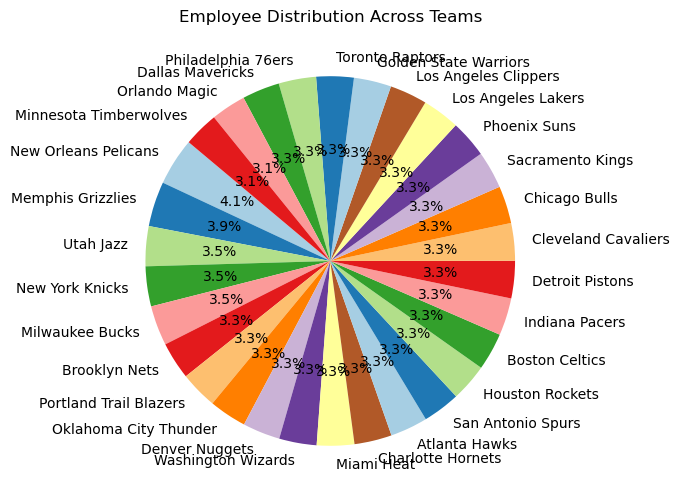

In [6]:
# Task 1: Distribution of employees across each team and percentage split
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100  # Calculate percentage

# Display the results
print("Team Distribution:")
print(team_distribution)
print("\nTeam Percentage:")
print(team_percentage)

# Visualization: Pie chart for team distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(team_distribution, labels=team_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Employee Distribution Across Teams')
plt.show()


Position Distribution:
SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64


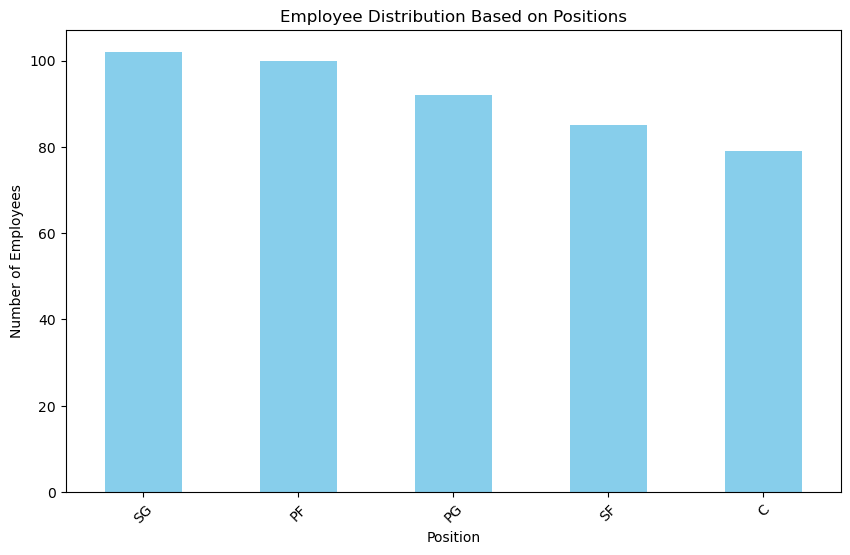

In [7]:
# Task 2: Segregate employees based on their positions
position_distribution = df['Position'].value_counts()

# Display the results
print("Position Distribution:")
print(position_distribution)

# Visualization: Bar chart for position distribution
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution Based on Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Age Group Distribution:
20-30    334
30-40    119
40-50      3
50-60      0
60-70      0
Name: Age Group, dtype: int64


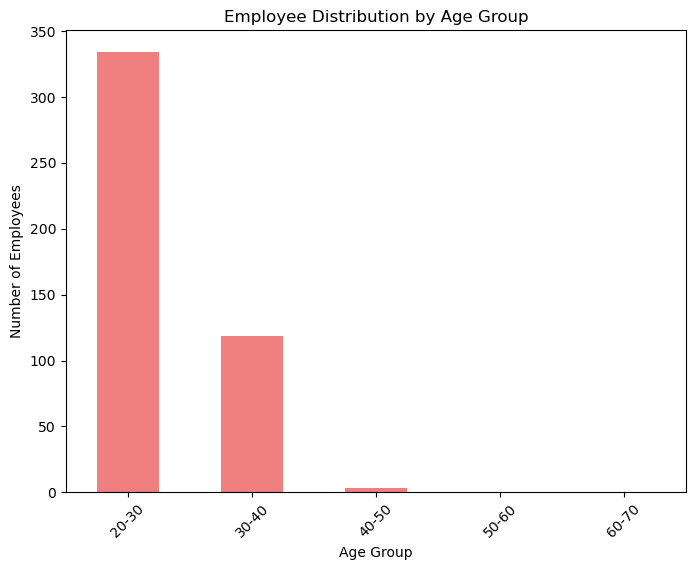

In [8]:
# Task 3: Identify the predominant age group among employees
# For simplicity, we’ll categorize employees into age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_distribution = df['Age Group'].value_counts()

# Display the results
print("Age Group Distribution:")
print(age_group_distribution)

# Visualization: Bar chart for age group distribution
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind='bar', color='lightcoral')
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Team Salary Expenditure:
Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolv

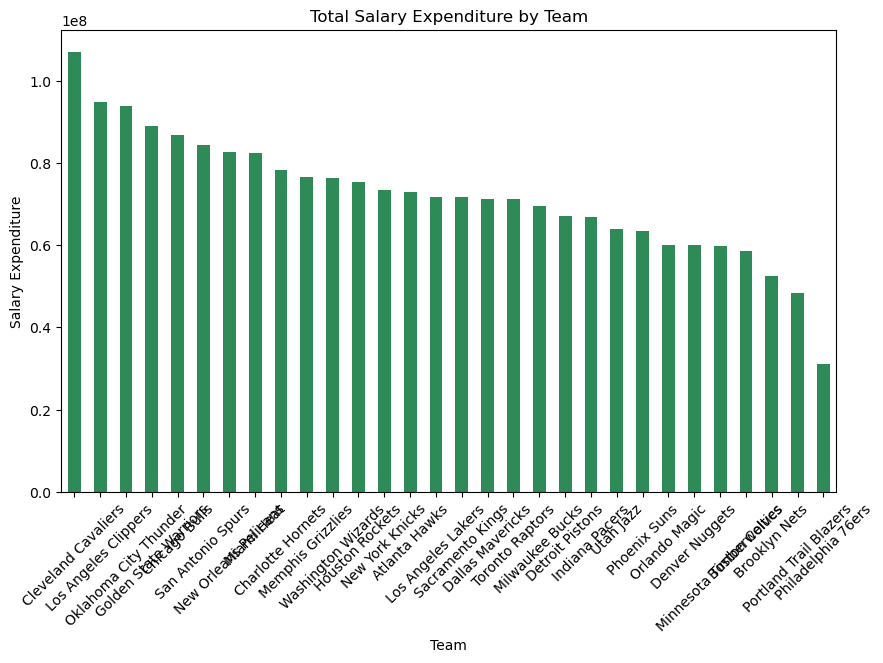

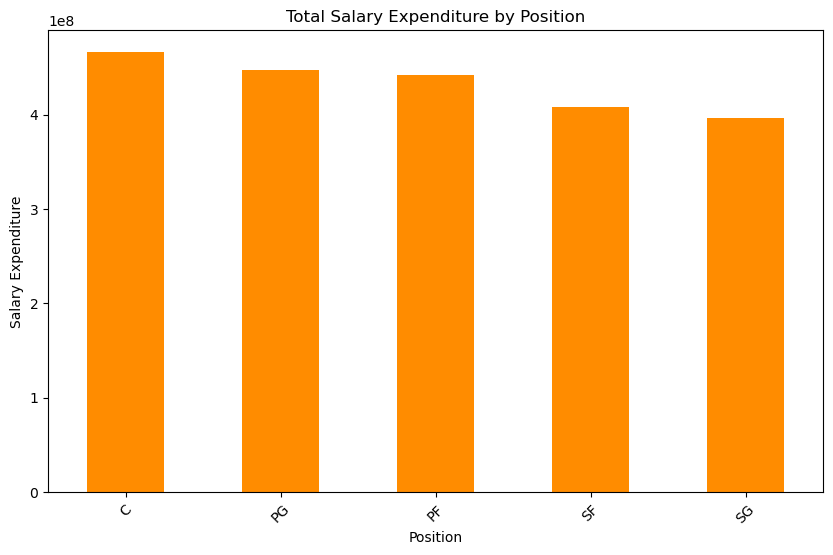

In [9]:
# Task 4: Find the team and position with the highest salary expenditure
team_salary_expenditure = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary_expenditure = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Display the results
print("Team Salary Expenditure:")
print(team_salary_expenditure)
print("\nPosition Salary Expenditure:")
print(position_salary_expenditure)

# Visualization: Bar chart for team salary expenditure
plt.figure(figsize=(10, 6))
team_salary_expenditure.plot(kind='bar', color='seagreen')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

# Visualization: Bar chart for position salary expenditure
plt.figure(figsize=(10, 6))
position_salary_expenditure.plot(kind='bar', color='darkorange')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Salary Expenditure')
plt.xticks(rotation=45)
plt.show()


Correlation between Age and Salary: 0.21400941226570971


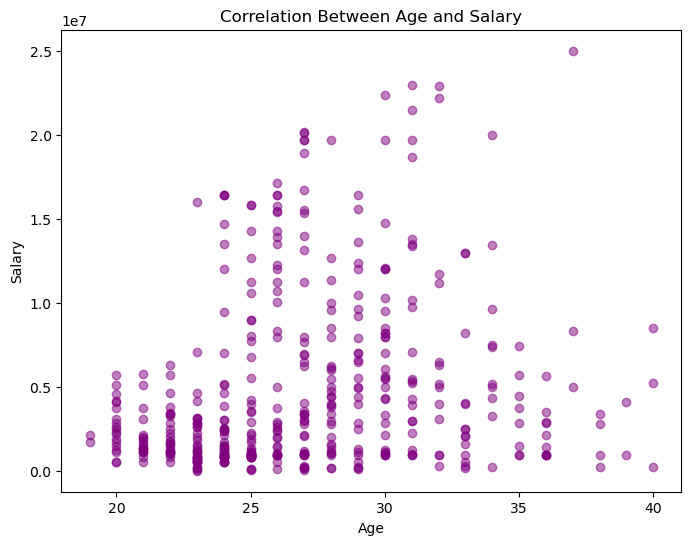

In [10]:
# Task 5: Investigate correlation between age and salary
correlation = df['Age'].corr(df['Salary'])

# Display the correlation
print(f"Correlation between Age and Salary: {correlation}")

# Visualization: Scatter plot for age vs salary
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Salary'], color='purple', alpha=0.5)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


In [11]:
df.to_csv("updated_employee_data.csv", index=False)
